In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import plotly.graph_objects as go
# import statsmodel


In [2]:
df = pd.read_json('data/cleaned_v1.2.json', lines=True)


In [3]:
df

Address           Suburb    Price  Bedrooms  Bathrooms  \
0            1 Acorn Place       South Lake   565000         4          2   
1              1 Addis Way            Wandi   365000         3          2   
2          1 Ainsley Court          Camillo   287000         3          1   
3          1 Albert Street         Bellevue   255000         2          1   
4             1 Aman Place        Lockridge   325000         4          1   
...                    ...              ...      ...       ...        ...   
28187  9B Teocote Crescent      Aubin Grove   423000         3          2   
28188      9B Viveash Road      Middle Swan   467000         4          2   
28189     9b Wesley Street  South Fremantle   955000         3          2   
28190       9C Gold Street  South Fremantle  1040000         4          3   
28191      9D Shalford Way       Girrawheen   295000         3          1   

       Garage  Land_Area  Floor_Area  Build_Year  Cbd_Dist  \
0           2        600         160        2003      18.3   
1           2        351         139        2013      26.9   
2           1        719          86        1979      22.6   
3           2        651          59        1953      17.9   
4           2        466         131        1998      11.2   
...       ...        ...         ...         ...       ...   
28187       2        248         108        2011      24.9   
28188       2        400         132        2014      17.1   
28189       1        200         127        1997      16.0   
28190       2        292         245        2013      16.1   
28191       2        457          85        1974      12.6   

                    Nearest_Stn  Nearest_Stn_Dist Date_Sold  Postcode  \
0      Cockburn Central Station               1.8   09-2018      6164   
1               Kwinana Station               4.9   02-2019      6167   
2               Challis Station               1.9   06-2015      6111   
3               Midland Station               3.6   07-2018      6056   
4            Bassendean Station               2.0   11-2016      6054   
...                         ...               ...       ...       ...   
28187  Cockburn Central Station               5.7   05-2016      6164   
28188           Midland Station               2.5   04-2015      6056   
28189         Fremantle Station               1.9   02-2019      6162   
28190         Fremantle Station               1.5   03-2016      6162   
28191           Warwick Station               4.4   10-2016      6064   

                         Nearest_Sch  Nearest_Sch_Dist  decade  
0        Lakeland Senior High School               0.8    2000  
1                     Atwell College               5.5    2010  
2       Kelmscott Senior High School               1.6    1970  
3       Swan View Senior High School               1.6    1950  
4                      Kiara College               1.5    1990  
...                              ...               ...     ...  
28187                 Atwell College               3.6    2010  
28188               La Salle College               1.1    2010  
28189              Fremantle College               1.1    1990  
28190    Christian Brothers' College               1.4    2010  
28191  Girrawheen Senior High School               0.4    1970  

[28192 rows x 17 columns]

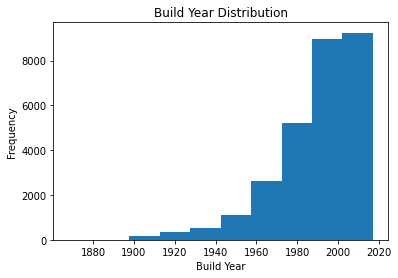

In [4]:
plt.hist(df['Build_Year'], bins=10)
plt.xlabel('Build Year')
plt.ylabel('Frequency')
plt.title('Build Year Distribution')
plt.show()



In [5]:
df = df[df['Build_Year'] >= 1960]


In [6]:
df

Address           Suburb    Price  Bedrooms  Bathrooms  \
0            1 Acorn Place       South Lake   565000         4          2   
1              1 Addis Way            Wandi   365000         3          2   
2          1 Ainsley Court          Camillo   287000         3          1   
4             1 Aman Place        Lockridge   325000         4          1   
5      1 Amethyst Crescent     Mount Richon   409000         4          2   
...                    ...              ...      ...       ...        ...   
28187  9B Teocote Crescent      Aubin Grove   423000         3          2   
28188      9B Viveash Road      Middle Swan   467000         4          2   
28189     9b Wesley Street  South Fremantle   955000         3          2   
28190       9C Gold Street  South Fremantle  1040000         4          3   
28191      9D Shalford Way       Girrawheen   295000         3          1   

       Garage  Land_Area  Floor_Area  Build_Year  Cbd_Dist  \
0           2        600         160        2003      18.3   
1           2        351         139        2013      26.9   
2           1        719          86        1979      22.6   
4           2        466         131        1998      11.2   
5           1        759         118        1991      27.3   
...       ...        ...         ...         ...       ...   
28187       2        248         108        2011      24.9   
28188       2        400         132        2014      17.1   
28189       1        200         127        1997      16.0   
28190       2        292         245        2013      16.1   
28191       2        457          85        1974      12.6   

                    Nearest_Stn  Nearest_Stn_Dist Date_Sold  Postcode  \
0      Cockburn Central Station               1.8   09-2018      6164   
1               Kwinana Station               4.9   02-2019      6167   
2               Challis Station               1.9   06-2015      6111   
4            Bassendean Station               2.0   11-2016      6054   
5              Armadale Station               1.0   03-2013      6112   
...                         ...               ...       ...       ...   
28187  Cockburn Central Station               5.7   05-2016      6164   
28188           Midland Station               2.5   04-2015      6056   
28189         Fremantle Station               1.9   02-2019      6162   
28190         Fremantle Station               1.5   03-2016      6162   
28191           Warwick Station               4.4   10-2016      6064   

                         Nearest_Sch  Nearest_Sch_Dist  decade  
0        Lakeland Senior High School               0.8    2000  
1                     Atwell College               5.5    2010  
2       Kelmscott Senior High School               1.6    1970  
4                      Kiara College               1.5    1990  
5        Armadale Senior High School               1.2    1990  
...                              ...               ...     ...  
28187                 Atwell College               3.6    2010  
28188               La Salle College               1.1    2010  
28189              Fremantle College               1.1    1990  
28190    Christian Brothers' College               1.4    2010  
28191  Girrawheen Senior High School               0.4    1970  

[25887 rows x 17 columns]

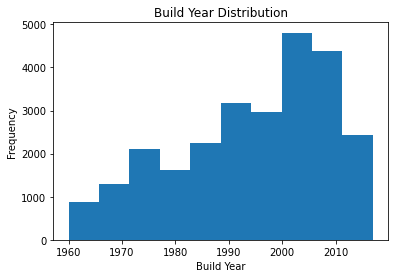

In [7]:
plt.hist(df['Build_Year'], bins=10)
plt.xlabel('Build Year')
plt.ylabel('Frequency')
plt.title('Build Year Distribution')
plt.show()

In [8]:
fig = px.scatter(df, x='Cbd_Dist', y='Price')
fig.update_traces(hovertemplate='Cbd_Dist=%{x}<br>Price=%{y}<br>Suburb=%{text}<br>Bedrooms=%{customdata}', text=df['Suburb'], customdata=df['Bedrooms'])

In [9]:
# Check the correlations against price
df.corr()['Price'].sort_values(ascending=False)

C:\Users\2much\AppData\Local\Temp\ipykernel_10764\3276717462.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Price               1.000000
Floor_Area          0.605225
Bathrooms           0.430696
Bedrooms            0.299019
Garage              0.172659
Land_Area           0.064284
decade              0.021409
Build_Year          0.018644
Nearest_Sch_Dist    0.009119
Nearest_Stn_Dist   -0.057970
Postcode           -0.145058
Cbd_Dist           -0.320893
Name: Price, dtype: float64

In [10]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['Cbd_Dist'].quantile(0.25)
Q3 = df['Cbd_Dist'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame
filtered_df = df[(df['Cbd_Dist'] >= lower_bound) & (df['Cbd_Dist'] <= upper_bound)]

# Step 4: Check the correlation of the filtered DataFrame
correlation = filtered_df.corr()


C:\Users\2much\AppData\Local\Temp\ipykernel_10764\1107599582.py:14: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [11]:
correlation['Price'].sort_values(ascending=False)

Price               1.000000
Floor_Area          0.609230
Bathrooms           0.433852
Bedrooms            0.301327
Garage              0.172859
Land_Area           0.059069
decade              0.026355
Build_Year          0.023795
Nearest_Sch_Dist    0.012048
Nearest_Stn_Dist   -0.046196
Postcode           -0.142334
Cbd_Dist           -0.329473
Name: Price, dtype: float64

In [12]:
# print column names
df.columns

Index(['Address', 'Suburb', 'Price', 'Bedrooms', 'Bathrooms', 'Garage',
       'Land_Area', 'Floor_Area', 'Build_Year', 'Cbd_Dist', 'Nearest_Stn',
       'Nearest_Stn_Dist', 'Date_Sold', 'Postcode', 'Nearest_Sch',
       'Nearest_Sch_Dist', 'decade'],
      dtype='object')

In [13]:
# Assuming 'df' is your DataFrame

# Create the 'Area_Ratio' column
df['Area_Ratio'] = df['Floor_Area'] / df['Land_Area']

# Check the new column
print(df[['Land_Area', 'Floor_Area', 'Area_Ratio']].head())

   Land_Area  Floor_Area  Area_Ratio
0        600         160    0.266667
1        351         139    0.396011
2        719          86    0.119611
4        466         131    0.281116
5        759         118    0.155468


C:\Users\2much\AppData\Local\Temp\ipykernel_10764\212290231.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
# Check the correlation of the new column
df.corr()['Price'].sort_values(ascending=False)

C:\Users\2much\AppData\Local\Temp\ipykernel_10764\1407382457.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Price               1.000000
Floor_Area          0.605225
Bathrooms           0.430696
Bedrooms            0.299019
Area_Ratio          0.251161
Garage              0.172659
Land_Area           0.064284
decade              0.021409
Build_Year          0.018644
Nearest_Sch_Dist    0.009119
Nearest_Stn_Dist   -0.057970
Postcode           -0.145058
Cbd_Dist           -0.320893
Name: Price, dtype: float64

In [15]:
# Step 1: Create 'total_rooms' column
df['Total_Rooms'] = df['Bedrooms'] + df['Bathrooms']

# Step 2: Calculate correlation with 'price'
correlation = df[['Total_Rooms', 'Price']].corr()

C:\Users\2much\AppData\Local\Temp\ipykernel_10764\1538054490.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
# Initialize variables to store the best weights and highest correlation found
best_corr = -1  # Start with a correlation that will be lower than any real correlation
best_weights = {'bedrooms': 0, 'bathrooms': 0}

# Define the range of weights to test
weight_range = np.arange(1, 6, 0.5)  # Example: from 1 to 6 in steps of 0.5

# Iterate over all possible combinations of weights within the specified range
for weight_bedroom in weight_range:
    for weight_bathroom in weight_range:
        # Calculate the weighted total rooms
        df['Weighted_Total_Rooms'] = (df['Bedrooms'] * weight_bedroom) + (df['Bathrooms'] * weight_bathroom)
        
        # Calculate the correlation with price
        current_corr = df['Weighted_Total_Rooms'].corr(df['Price'])
        
        # Update the best weights if the current correlation is higher than the best found so far
        if current_corr > best_corr:
            best_corr = current_corr
            best_weights['bedrooms'] = weight_bedroom
            best_weights['bathrooms'] = weight_bathroom

# Output the best weights and the highest correlation found
print(f"Best Weights: Bedrooms = {best_weights['bedrooms']}, Bathrooms = {best_weights['bathrooms']}")
print(f"Highest Correlation with Price: {best_corr}")

C:\Users\2much\AppData\Local\Temp\ipykernel_10764\3082400959.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Best Weights: Bedrooms = 1.0, Bathrooms = 5.5
Highest Correlation with Price: 0.4372238480561707


In [38]:
# Initialize variables to store the best weights and highest correlation found
best_corr = -1  # Start with a correlation that will be lower than any real correlation
best_weights = {'bedrooms': 0, 'bathrooms': 0, 'garage': 0}

# Define the range of weights to test
weight_range = np.arange(1, 6, 0.5)  # Example: from 1 to 6 in steps of 0.5

# Iterate over all possible combinations of weights within the specified range
for weight_bedroom in weight_range:
    for weight_bathroom in weight_range:
        for weight_garage in weight_range:
            # Calculate the weighted total rooms including garage
            df['Weighted_Feature'] = (df['Bedrooms'] * weight_bedroom) + \
                                     (df['Bathrooms'] * weight_bathroom) + \
                                     (df['Garage'] * weight_garage)
            
            # Calculate the correlation with price
            current_corr = df['Weighted_Feature'].corr(df['Price'])
            
            # Update the best weights if the current correlation is higher than the best found so far
            if current_corr > best_corr:
                best_corr = current_corr
                best_weights['bedrooms'] = weight_bedroom
                best_weights['bathrooms'] = weight_bathroom
                best_weights['garage'] = weight_garage

# Output the best weights and the highest correlation found
print(f"Best Weights: Bedrooms = {best_weights['bedrooms']}, Bathrooms = {best_weights['bathrooms']}, Garage = {best_weights['garage']}")
print(f"Highest Correlation with Price: {best_corr}")

C:\Users\2much\AppData\Local\Temp\ipykernel_10764\538345979.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Best Weights: Bedrooms = 1.0, Bathrooms = 5.5, Garage = 1.0
Highest Correlation with Price: 0.43983948192931316


In [48]:
# Assign weights
weight_bedroom = 1
weight_bathroom = 5.5
weight_garage = 1
# Calculate the weighted total rooms feature
df['Weighted_Total_Rooms'] = (df['Bedrooms'] * weight_bedroom) + (df['Bathrooms'] * weight_bathroom) + (df['Garage'] * weight_garage)

C:\Users\2much\AppData\Local\Temp\ipykernel_10764\1202672179.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
# Initialize variables to store the best weights and highest correlation found
best_corr = -np.inf  # Initialize with negative infinity
best_weights = {'Floor_Area': 0, 'Land_Area': 0}

# Define the range of weights to test
weight_range = np.arange(0.1, 5.1, 0.1)  # Adjust as needed

# Iterate over all possible combinations of weights within the specified range
for w_floor in weight_range:
    for w_land in weight_range:
        # Calculate the new weighted area metric
        df['Weighted_Area_Metric'] = (df['Floor_Area'] * w_floor) + (df['Land_Area'] * w_land)
        
        # Calculate the correlation with price
        current_corr = df['Weighted_Area_Metric'].corr(df['Price'])
        
        # Update the best weights if the current correlation is higher than the best found so far
        if current_corr > best_corr:
            best_corr = current_corr
            best_weights['Floor_Area'] = w_floor
            best_weights['Land_Area'] = w_land

# Output the best weights and the highest correlation found
print(f"Best Weights: Floor_Area = {best_weights['Floor_Area']}, Land_Area = {best_weights['Land_Area']}")
print(f"Highest Correlation with Price: {best_corr}")

C:\Users\2much\AppData\Local\Temp\ipykernel_10764\202610870.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Best Weights: Floor_Area = 5.0, Land_Area = 0.1
Highest Correlation with Price: 0.18437729340836403


In [19]:
# Assign weights
w_floor = 0.1
w_land = 5.5
# Calculate the weighted area metric
df['Weighted_Area_Metric'] = (df['Floor_Area'] * w_floor) + (df['Land_Area'] * w_land)


C:\Users\2much\AppData\Local\Temp\ipykernel_10764\2580099393.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
#Check correlation with floor area
df.corr()['Floor_Area'].sort_values(ascending=False)

C:\Users\2much\AppData\Local\Temp\ipykernel_10764\1133951943.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Floor_Area              1.000000
Total_Rooms             0.641576
Weighted_Total_Rooms    0.621818
Price                   0.605225
Bathrooms               0.583779
Bedrooms                0.551001
Area_Ratio              0.339496
Build_Year              0.275972
decade                  0.270884
Garage                  0.242395
Nearest_Sch_Dist        0.119574
Nearest_Stn_Dist        0.106539
Weighted_Area_Metric    0.063687
Land_Area               0.063611
Cbd_Dist                0.012261
Postcode               -0.050978
Name: Floor_Area, dtype: float64

In [49]:
# Check the correlation of the new column
df.corr()['Price'].sort_values(ascending=False)

C:\Users\2much\AppData\Local\Temp\ipykernel_10764\1407382457.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Price                   1.000000
Floor_Area              0.605225
Weighted_Total_Rooms    0.439839
Bathrooms               0.430696
Total_Rooms             0.405399
Weighted_Feature        0.369413
Bedrooms                0.299019
Area_Ratio              0.251161
Garage                  0.172659
Weighted_Area_Metric    0.064330
Land_Area               0.064284
decade                  0.021409
Build_Year              0.018644
Nearest_Sch_Dist        0.009119
Nearest_Stn_Dist       -0.057970
Postcode               -0.145058
Cbd_Dist               -0.320893
Name: Price, dtype: float64

In [22]:
# df excluding non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming df is your DataFrame and 'Price' is the target variable
# Select only the 'Floor_Area' and 'Weighted_Total_Rooms' columns for features
X = df[['Floor_Area', 'Weighted_Total_Rooms']]  # Features
y = df['Price']  # Target variable

# Since we are only using numeric features, we can simplify the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Floor_Area', 'Weighted_Total_Rooms'])
])

# Create a pipeline that first preprocesses the data, then fits a Gradient Boosting model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Perform 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE (Root Mean Squared Error) for each fold
rmse_scores = np.sqrt(-scores)

# Output the results
print("RMSE scores for each fold:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

RMSE scores for each fold: [257430.11295644 258209.31734268 254323.49188074 255020.14627583
 250050.64647183]
Average RMSE: 255006.74298550477


In [24]:
# check average house price
df['Price'].mean()

619444.5097153011

In [109]:
from sklearn.model_selection import GridSearchCV

# Define your feature matrix and target vector
X = df[['Floor_Area', 'Weighted_Total_Rooms']]  # Features
y = df['Price']  # Target variable

# Define a simple preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Floor_Area', 'Weighted_Total_Rooms'])
])

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (RMSE):", np.sqrt(-grid_search.best_score_))


Best parameters: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__n_estimators': 300}
Best cross-validation score (RMSE): 255766.79608489378


In [ ]:
correlation_matrix = df.corr()

In [25]:
# Check for multicollinearity
correlation = df[['Bedrooms', 'Bathrooms', 'Total_Rooms']].corr()


In [26]:
correlation

Bedrooms  Bathrooms  Total_Rooms
Bedrooms     1.000000   0.548026     0.907383
Bathrooms    0.548026   1.000000     0.848839
Total_Rooms  0.907383   0.848839     1.000000

C:\Users\2much\AppData\Local\Temp\ipykernel_10764\4139765226.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



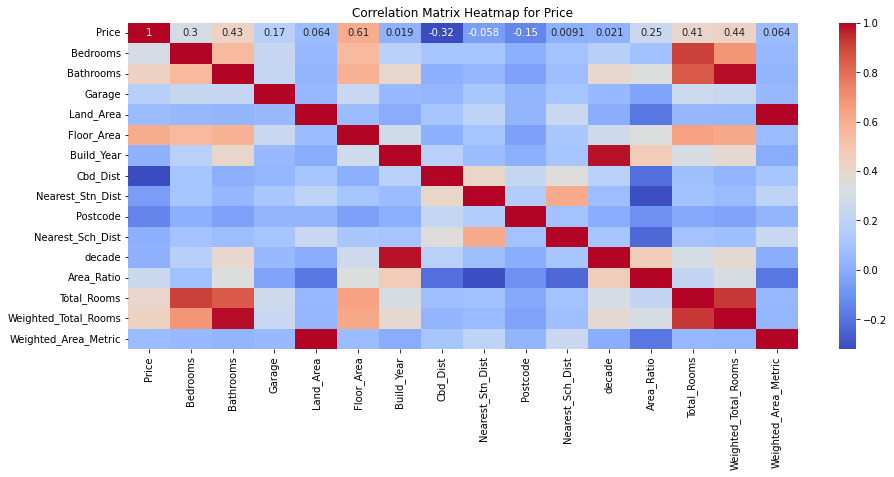

In [29]:
plt.figure(figsize=(15, 6))  # Set the figure size. You can adjust the numbers as needed.
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Price')
plt.show()


In [87]:
fig = px.scatter(df, x='Floor_Area', y='Price', hover_data=['Address', 'Bedrooms', 'Cbd_Dist'])
fig.show()


In [79]:
new_df = df[(df['Floor_Area'] >= 50) & (df['Floor_Area'] <= 350)]


In [106]:

import plotly.express as px
import plotly.graph_objs as go

# Calculate the IQR for the 'Price' variable
q1 = new_df['Price'].quantile(0.25)
q3 = new_df['Price'].quantile(0.75)
iqr = q3 - q1

# Create scatter plot with semi-transparent points
fig = px.scatter(new_df, x='Floor_Area', y='Price', opacity=0.5)

# Add the trendline
fig.add_trace(
    go.Scatter(
        x=new_df['Floor_Area'],
        y=m*new_df['Floor_Area'] + b,
        mode='lines',
        line=dict(color='red', width=4),
        name='Trendline'
    )
)

# Add horizontal lines for the IQR
fig.add_shape(type='line', x0=new_df['Floor_Area'].min(), x1=new_df['Floor_Area'].max(), y0=q1, y1=q1,
              line=dict(color='Green', width=2, dash='dash'), name='Q1')
fig.add_shape(type='line', x0=new_df['Floor_Area'].min(), x1=new_df['Floor_Area'].max(), y0=q3, y1=q3,
              line=dict(color='Green', width=2, dash='dash'), name='Q3')

# Optionally add a shaded area to represent the IQR
fig.add_trace(
    go.Scatter(
        x=[new_df['Floor_Area'].min(), new_df['Floor_Area'].max(), new_df['Floor_Area'].max(), new_df['Floor_Area'].min()],
        y=[q1, q1, q3, q3],
        fill='toself',
        fillcolor='rgba(0,100,0,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name='IQR Area'
    )
)

# Show the figure
fig.show()


In [137]:
# check new df correlation with price
df.corr()['Price'].sort_values(ascending=False)

C:\Users\2much\AppData\Local\Temp\ipykernel_10764\3367073667.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Price                   1.000000
Floor_Area              0.605225
Weighted_Total_Rooms    0.439839
Bathrooms               0.430696
Total_Rooms             0.405399
Weighted_Feature        0.369413
Bedrooms                0.299019
Area_Ratio              0.251161
Garage                  0.172659
Weighted_Area_Metric    0.064330
Land_Area               0.064284
decade                  0.021409
Build_Year              0.018644
Nearest_Sch_Dist        0.009119
Nearest_Stn_Dist       -0.057970
Postcode               -0.145058
Cbd_Dist               -0.320893
Name: Price, dtype: float64

In [138]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df[['Floor_Area', 'Weighted_Total_Rooms', 'decade','Area_Ratio']]  # Features
y = df['Price']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Evaluate each model using cross-validation and calculate RMSE
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} - Average RMSE: {np.mean(rmse_scores)}")


Linear Regression - Average RMSE: 259143.54968602728
Gradient Boosting - Average RMSE: 242466.99930501572
Random Forest - Average RMSE: 251748.03933544253


In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit it to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding RMSE
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score (RMSE): {best_score}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score (RMSE): 240454.1066165146


In [145]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model with the best parameters
model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Fit the model on the entire training dataset
model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=5, random_state=42)

In [146]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse_test}")


Test RMSE: 224216.44849504836


In [147]:
feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)


                Feature  Importance
0            Floor_Area    0.689164
3            Area_Ratio    0.164195
1  Weighted_Total_Rooms    0.073485
2                decade    0.073156


In [148]:
# Selecting samples for prediction
X_sample = X.iloc[0:10]
predicted_prices = model.predict(X_sample)

# Displaying predictions along with the difference
actual_prices = y.iloc[0:10].values
for i, (predicted, actual) in enumerate(zip(predicted_prices, actual_prices)):
    difference = predicted - actual
    print(f"Entry {i}: Predicted Price = ${predicted:.2f}, Actual Price = ${actual:.2f}, Difference = ${difference:.2f}")


Entry 0: Predicted Price = $447044.81, Actual Price = $565000.00, Difference = $-117955.19
Entry 1: Predicted Price = $401436.36, Actual Price = $365000.00, Difference = $36436.36
Entry 2: Predicted Price = $342510.99, Actual Price = $287000.00, Difference = $55510.99
Entry 3: Predicted Price = $429083.87, Actual Price = $325000.00, Difference = $104083.87
Entry 4: Predicted Price = $424937.90, Actual Price = $409000.00, Difference = $15937.90
Entry 5: Predicted Price = $400392.73, Actual Price = $400000.00, Difference = $392.73
Entry 6: Predicted Price = $428170.62, Actual Price = $370000.00, Difference = $58170.62
Entry 7: Predicted Price = $584429.28, Actual Price = $565000.00, Difference = $19429.28
Entry 8: Predicted Price = $556316.81, Actual Price = $685000.00, Difference = $-128683.19
Entry 9: Predicted Price = $711235.90, Actual Price = $675000.00, Difference = $36235.90
